In [1]:
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np

In [2]:
def CalcOfDamageAndNonDamage (image_name):
    image = cv.imread(image_name)
    
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7, 7))
    image_erode = cv.erode(image, kernel)

    hsv_img = cv.cvtColor(image_erode, cv.COLOR_BGR2HSV)

    markers = np.zeros((image.shape[0], image.shape[1]), dtype = "int32")
    markers[90:140, 90:140] = 255
    markers[236:255, 0:20] = 1
    markers[0:20, 0:20] = 1
    markers[0:20, 236:255] = 1
    markers[236:255, 236:255] = 1
    leafs_area_BGR = cv.watershed(image_erode, markers)

    healthy_part = cv.inRange(hsv_img, (36, 25, 25), (86, 255, 255))
    ill_part = leafs_area_BGR - healthy_part
    
    mask = np.zeros_like(image, np.uint8)
    mask[leafs_area_BGR > 1] = (255, 0, 255)
    mask[ill_part > 1] = (0, 0, 255)
    return mask

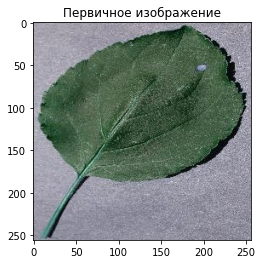

In [5]:
img = cv.imread ("7.jpg")
plt.imshow(img)
plt.title("Первичное изображение")
plt.show()

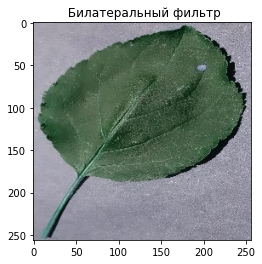

In [27]:
bltr = cv.bilateralFilter(img, 10, 25, 15)
cv.imwrite("bltr.png", bltr)
plt.imshow(bltr)
plt.title(" Билатеральный фильтр")
plt.show()

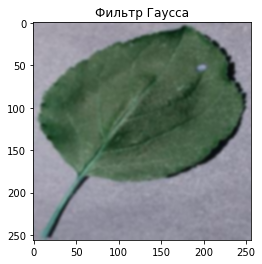

In [28]:
gaus = cv.GaussianBlur(img, (7, 7), 0)
cv.imwrite("gaus.png", gaus)
plt.imshow(gaus)
plt.title("Фильтр Гаусса")
plt.show()

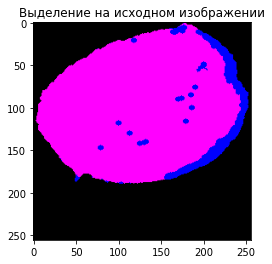

In [29]:
r1 = CalcOfDamageAndNonDamage("7.jpg")
plt.imshow(r1)
plt.title("Выделение на исходном изображении")
plt.show()

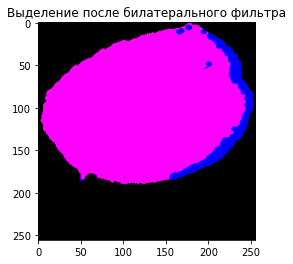

In [30]:
r2 = CalcOfDamageAndNonDamage("bltr.png")
plt.imshow(r2)
plt.title("Выделение после билатерального фильтра")
plt.show()

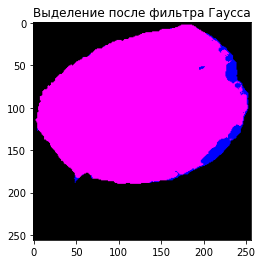

In [31]:
r3 = CalcOfDamageAndNonDamage("gaus.png")
plt.imshow(r3)
plt.title("Выделение после фильтра Гаусса")
plt.show()

При выделении поврежденных участков листа на данном изображении, лучшие результаты получились после применения фильтра Гаусса или билатерального фильтра. При выделении на исходном изображении, выделяются много не поврежденных зон. Шум сильно влияет на результат.